## Required Libraries Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, RidgeCV, LogisticRegressionCV, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import dmba
from dmba import regressionSummary, exhaustive_search, backward_elimination, forward_selection, stepwise_selection, adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skopt import BayesSearchCV
from sklearn.datasets import load_diabetes
from skopt.space import Real
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from scipy.stats import reciprocal, uniform

%matplotlib inline

## Import Datasets

### First dataset = day.csv

In [2]:
# Load the CSV file into a DataFrame
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Second dataset = hour.csv

In [3]:
# Load the CSV file into a DataFrame
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Descriptive Statistics and Exploration 
### Day Dataframe

In [4]:
# Describibg df_day dataset
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [5]:
# Get datatypes for df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Identify null values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Get the shape of the df_day dataframe
df_day.shape

(731, 16)

### Hour dataframe

In [8]:
# Describing the df_hour dataset
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [9]:
# Get data types for df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Identify null values
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Get shape of df_hour dataframe
df_hour.shape

(17379, 17)

## Add Revenue Information

### Note: revenue numbers are real prices taken from the LA bike share program

In [12]:
# Define the cost per hour for casual and registered, in dollars:
casual_cost_per_hour = 3.50
registered_cost_per_hour = 0.08

In [13]:
# Create new columns for Casual_Revenue, Registered_Revenue, and Total_Revenue
df_hour['Casual_Revenue'] = df_hour['casual'] * casual_cost_per_hour
df_hour['Registered_Revenue'] = df_hour['registered'] * registered_cost_per_hour
df_hour['Total_Revenue'] = df_hour['Casual_Revenue'] + df_hour['Registered_Revenue']


## EDA and Preprocessing

### Bike usage by season, df_day

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


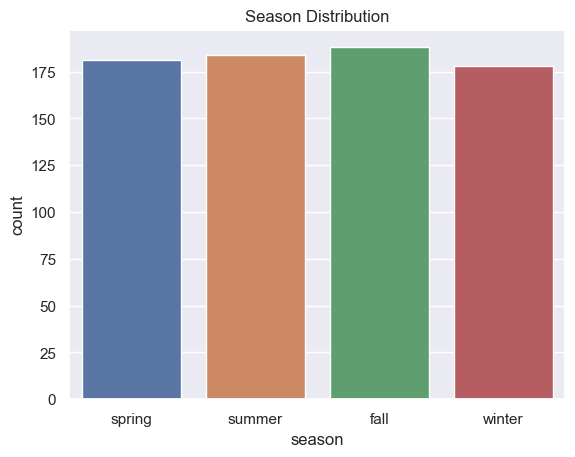

In [14]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of the Dataframe
new_day = df_day.copy()

# Map the season column
new_day['season'] = new_day['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_day['season'] = pd.Categorical(new_day['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

### Bike usage by season, df_hour

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


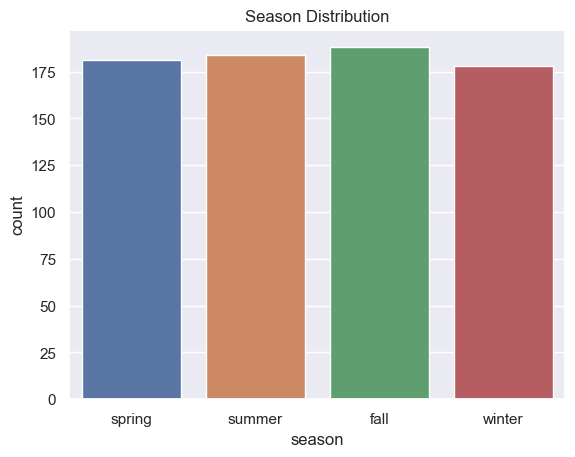

In [15]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of the DataFrame
new_hour = df_hour.copy()

# Map the season column
new_hour['season'] = new_hour['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_hour['season'] = pd.Categorical(new_hour['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

### Getting boxplots and histograms for season, registered, temp for df_day

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


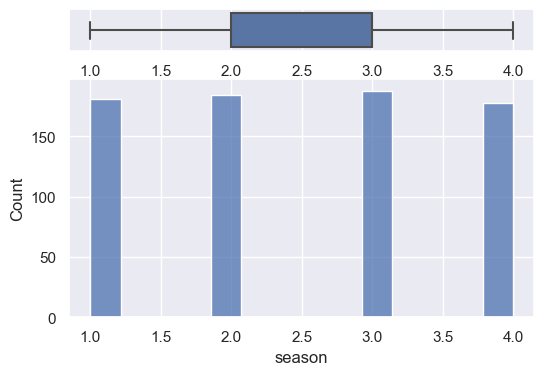

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


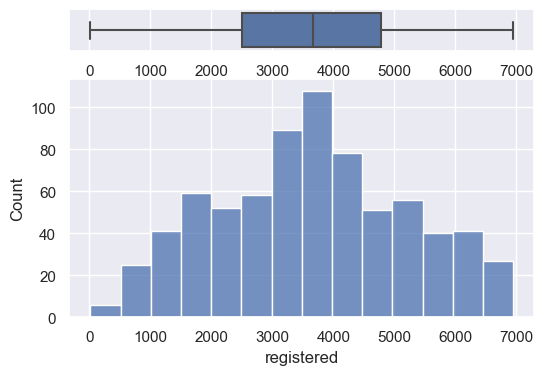

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


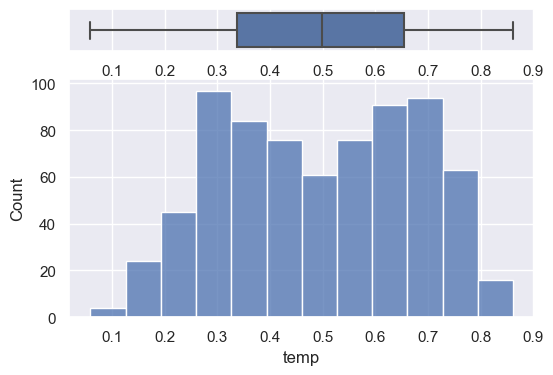

In [16]:
def print_box_hist(data, data1):
    sns.set(style="darkgrid")
    
    # Create a 2x1 grid of subplots
    f, axes = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})
    
    # Boxplot
    sns.boxplot(data, x=data1, orient="h", ax=axes[0])
    # Histogram
    sns.histplot(data, x=data1, ax=axes[1])

    # Removing X-axis Labels for Boxplot
    axes[0].set(xlabel='')
    
    plt.show()

print_box_hist(df_day, "season")
print_box_hist(df_day, "registered")
print_box_hist(df_day, "temp")


### Getting boxplots and histograms for season, registered, temp for df_hour

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


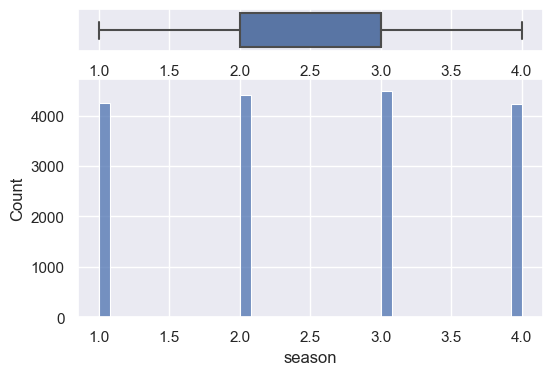

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


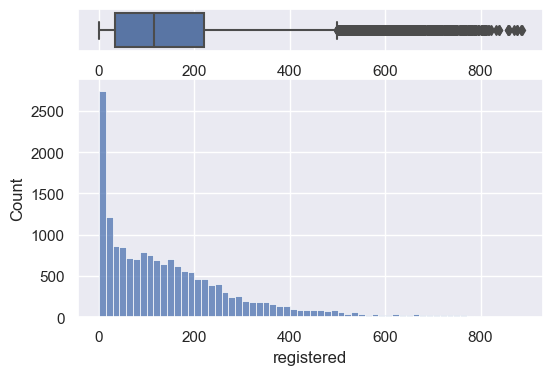

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


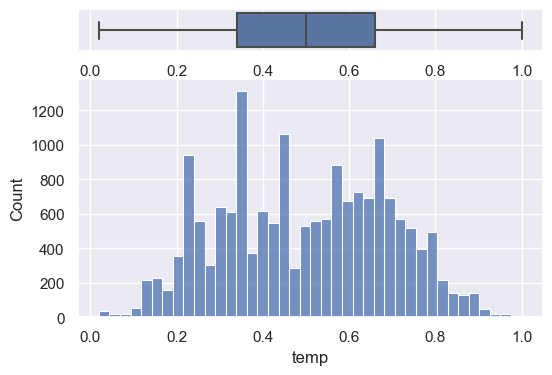

In [17]:
print_box_hist(df_hour, "season")
print_box_hist(df_hour, "registered")
print_box_hist(df_hour, "temp")

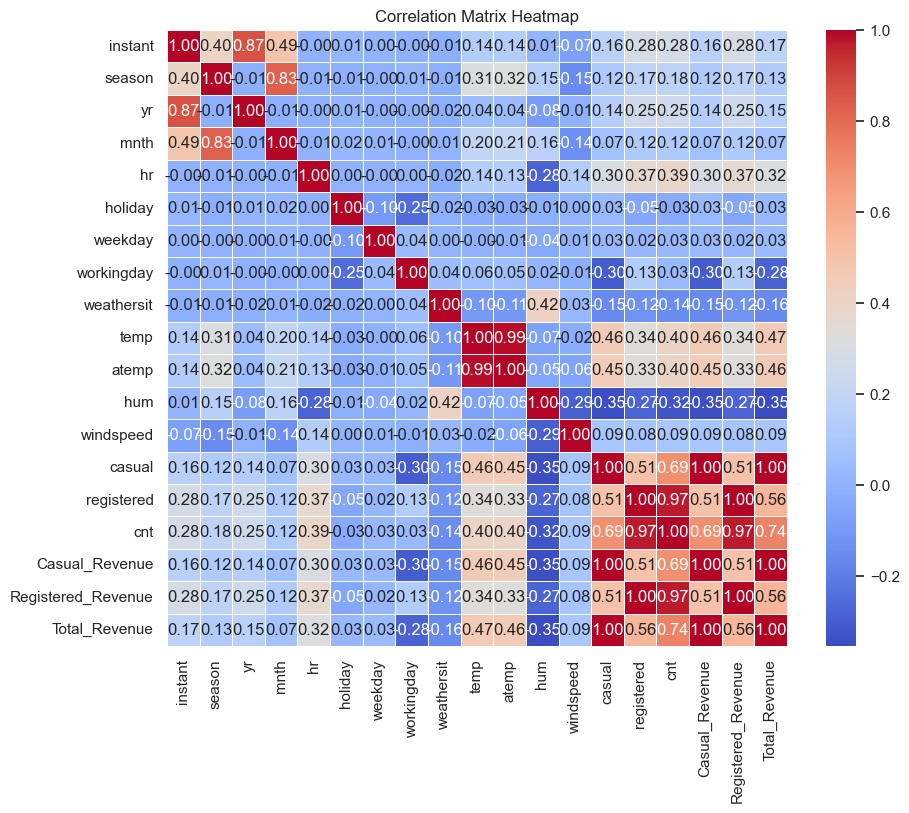

In [18]:
# Numerical columns for the correlation matrix
numerical_columns = df_hour.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

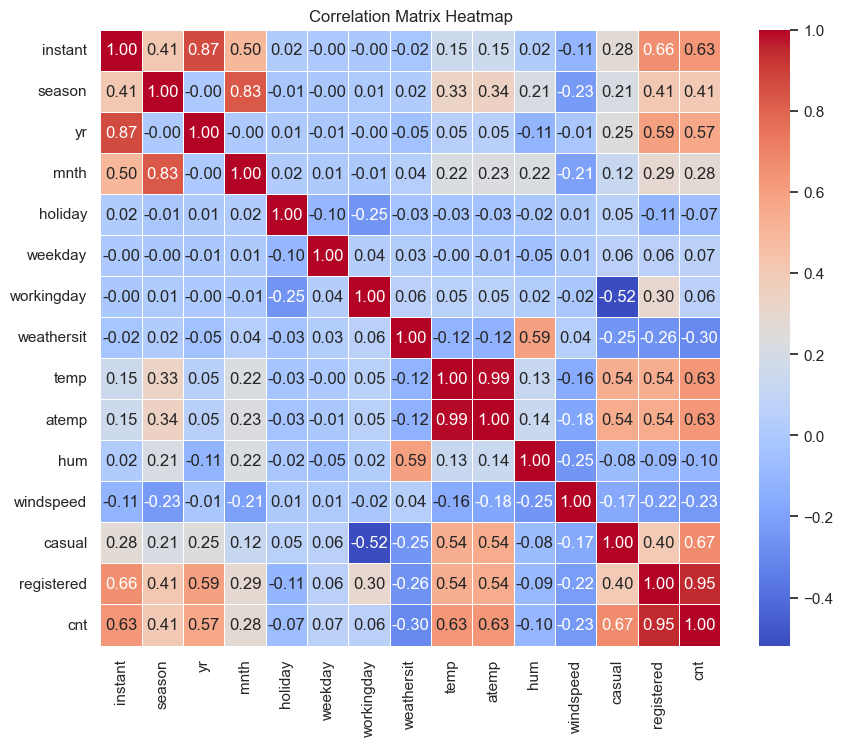

In [19]:
# Numerical columns for the correlation matrix
numerical_columns = df_day.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

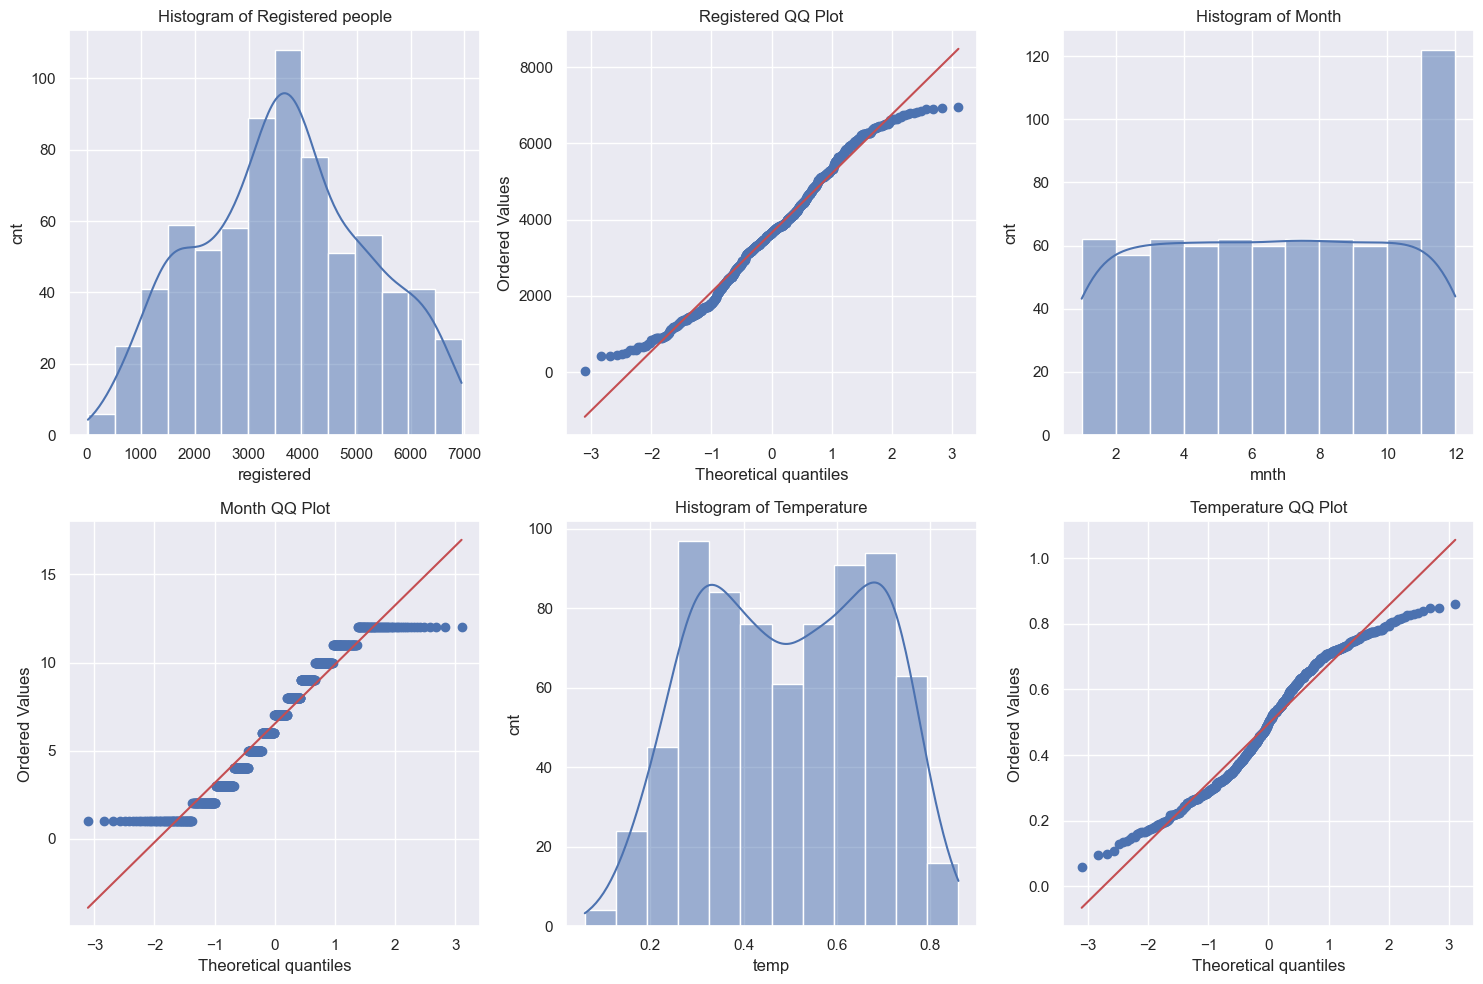

In [20]:
# build histograms to get distribtuions

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings

# Suppress specific Seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_day['registered'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Registered people")

plt.subplot(2, 3, 2)
stats.probplot(df_day['registered'], dist="norm", plot=plt)
plt.title('Registered QQ Plot')

plt.subplot(2, 3, 3)
sns.histplot(df_day['mnth'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Month")

plt.subplot(2, 3, 4)
stats.probplot(df_day['mnth'], dist="norm", plot=plt)
plt.title('Month QQ Plot')

plt.subplot(2, 3, 5)
sns.histplot(df_day['temp'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Temperature")

plt.subplot(2, 3, 6)
stats.probplot(df_day['temp'], dist="norm", plot=plt)
plt.title('Temperature QQ Plot')

plt.tight_layout()
plt.show()


In [21]:
#Check for data types
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             17379 non-null  int64  
 1   dteday              17379 non-null  object 
 2   season              17379 non-null  int64  
 3   yr                  17379 non-null  int64  
 4   mnth                17379 non-null  int64  
 5   hr                  17379 non-null  int64  
 6   holiday             17379 non-null  int64  
 7   weekday             17379 non-null  int64  
 8   workingday          17379 non-null  int64  
 9   weathersit          17379 non-null  int64  
 10  temp                17379 non-null  float64
 11  atemp               17379 non-null  float64
 12  hum                 17379 non-null  float64
 13  windspeed           17379 non-null  float64
 14  casual              17379 non-null  int64  
 15  registered          17379 non-null  int64  
 16  cnt 

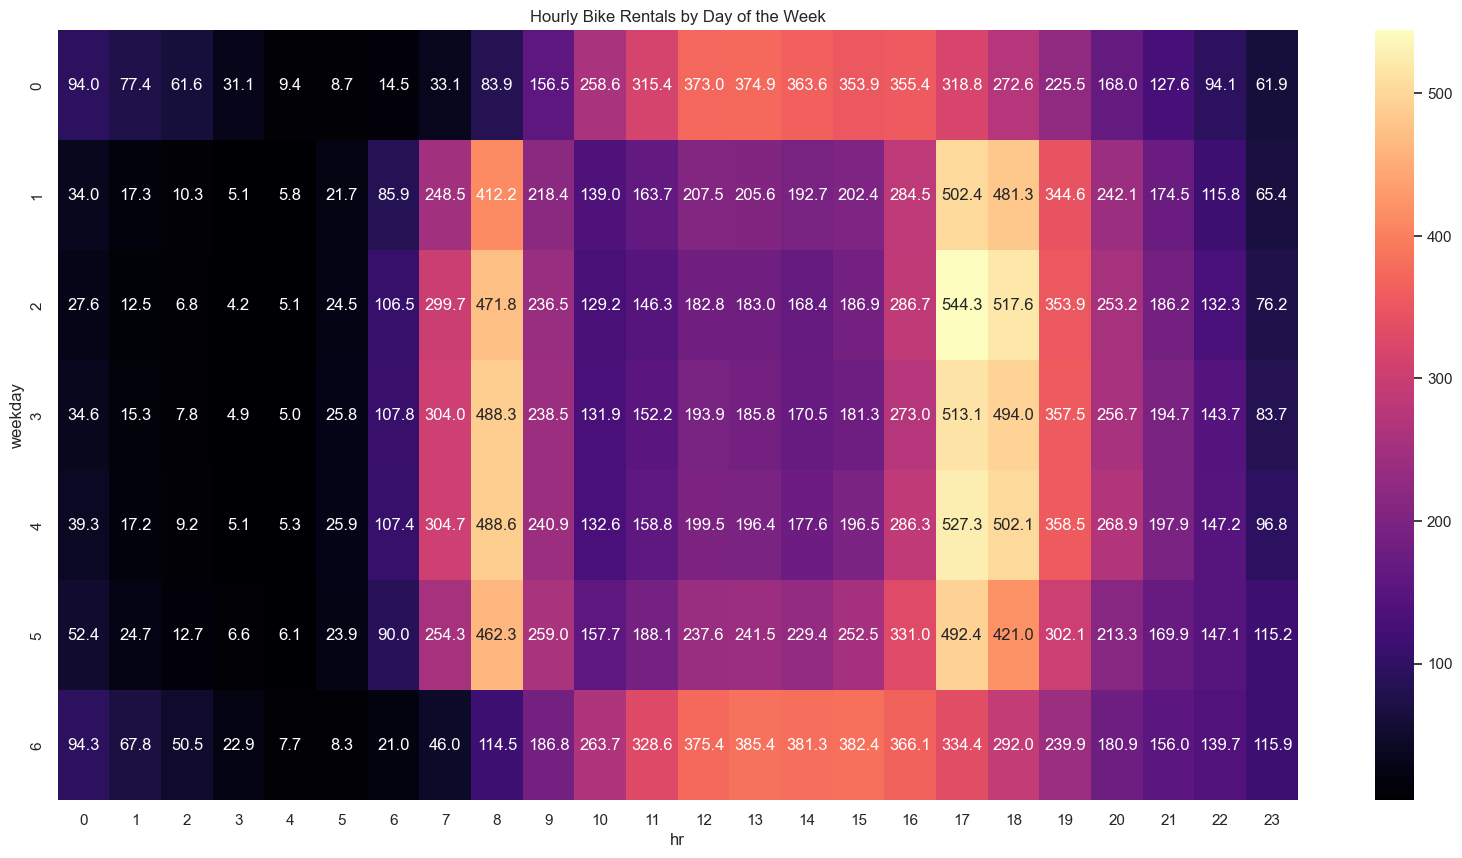

In [23]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Day of the Week')
plt.show()

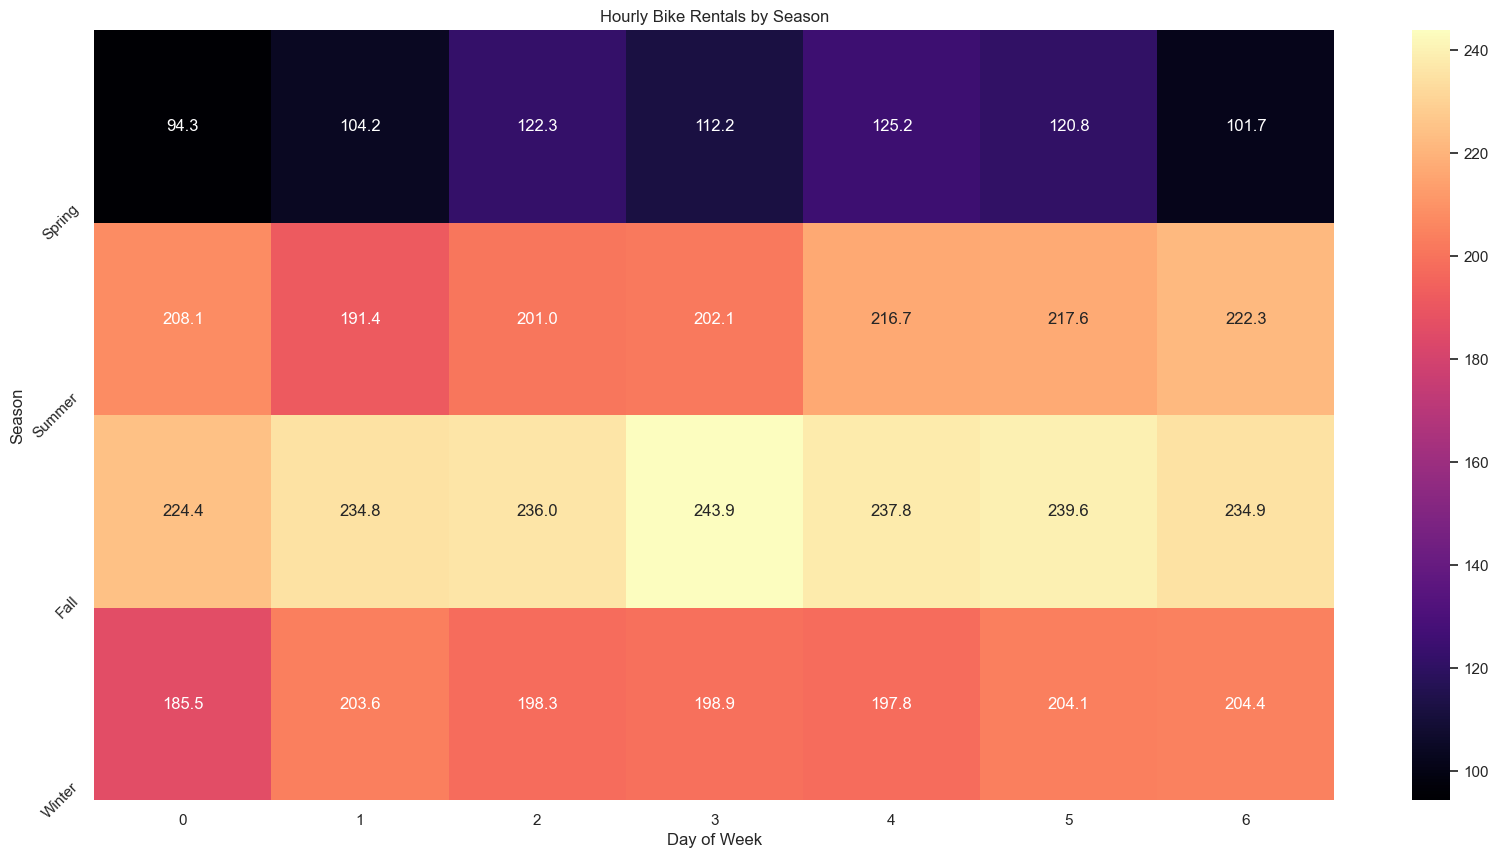

In [24]:
heatmap_data = df_hour.pivot_table(index='season', columns='weekday', values='cnt', aggfunc='mean')

# Define season labels
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f', xticklabels=range(7))
plt.title('Hourly Bike Rentals by Season')
plt.xlabel('Day of Week')
plt.ylabel('Season')
plt.xticks(rotation=0) 
plt.yticks(ticks=range(1, 5), labels=season_labels, rotation=45) 
plt.show()

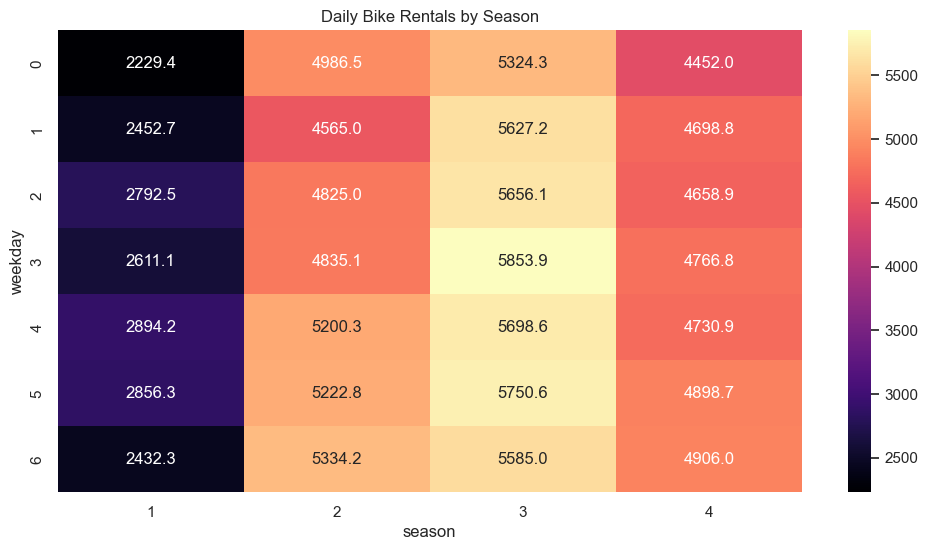

In [25]:
# Create a pivot table for the heatmap
heatmap_data = df_day.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Daily Bike Rentals by Season')
plt.show()

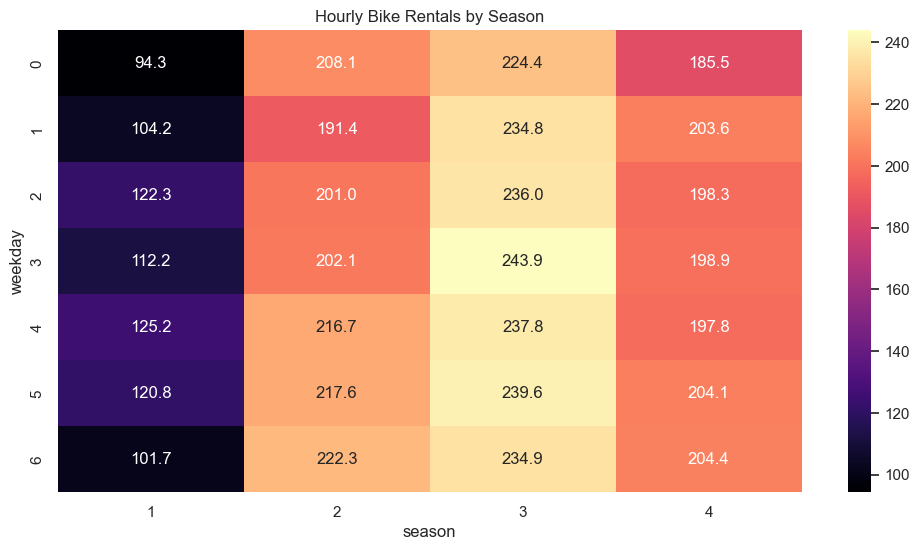

In [26]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Season')
plt.show()

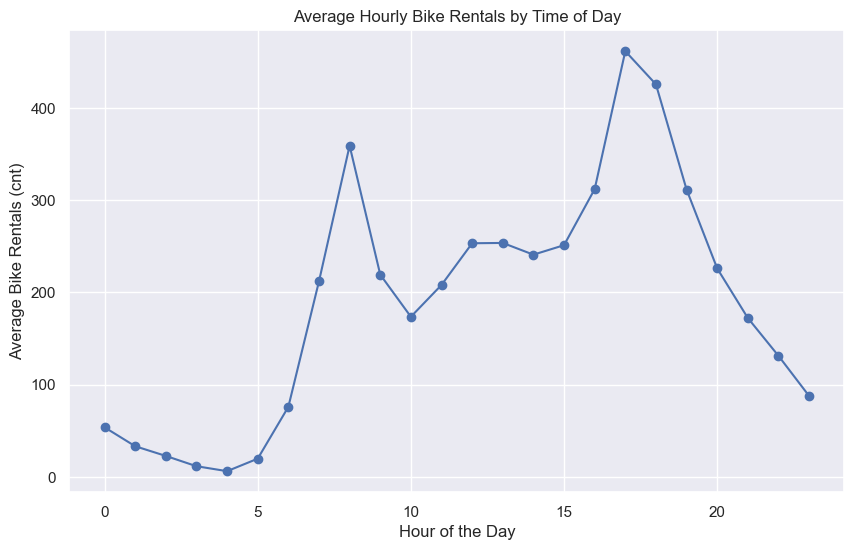

In [27]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Time of Day')
plt.grid(True)
plt.show()

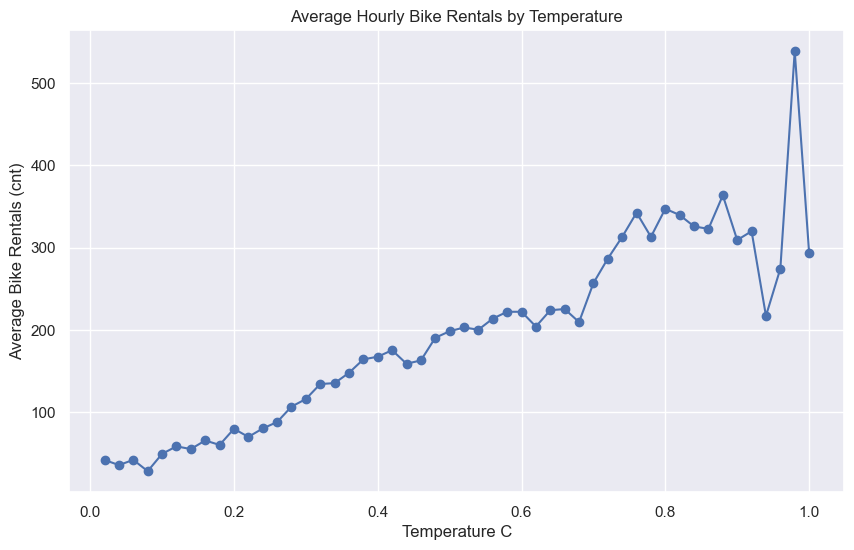

In [28]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('temp')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Temperature C')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Temperature')
plt.grid(True)
plt.show()

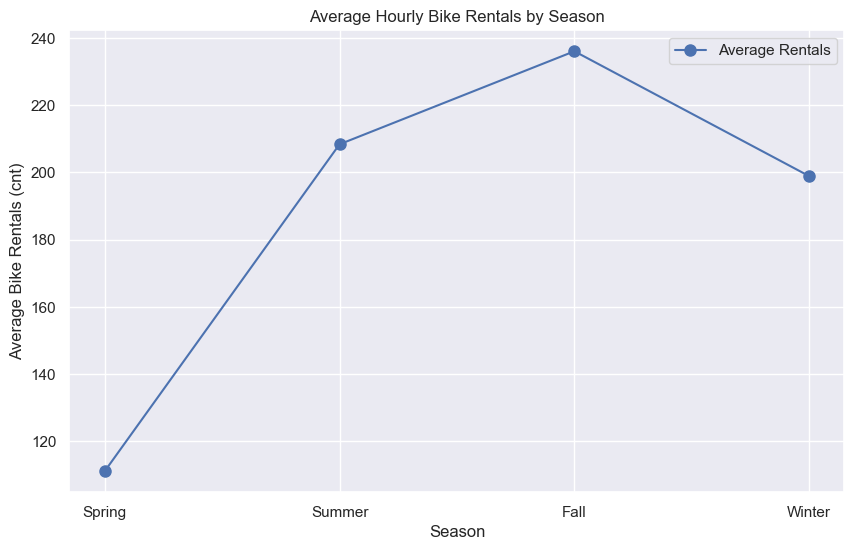

In [29]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_hour.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

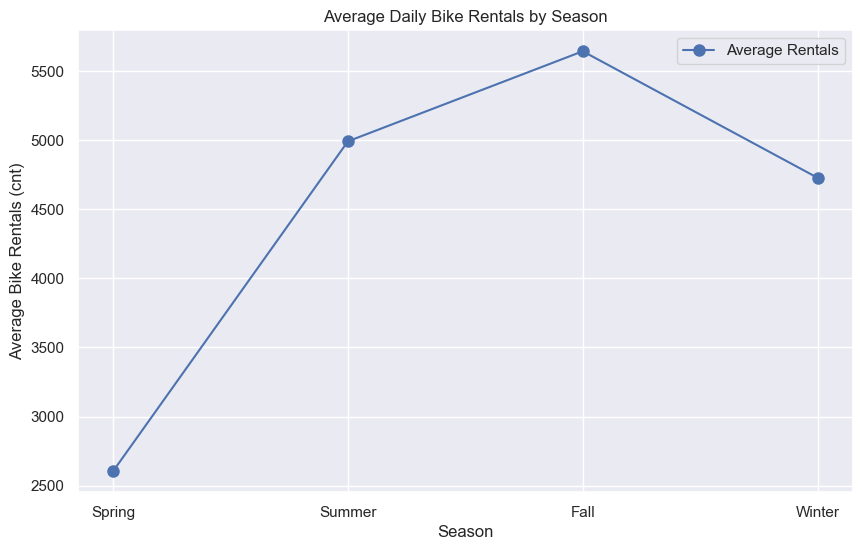

In [30]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_day.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Daily Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

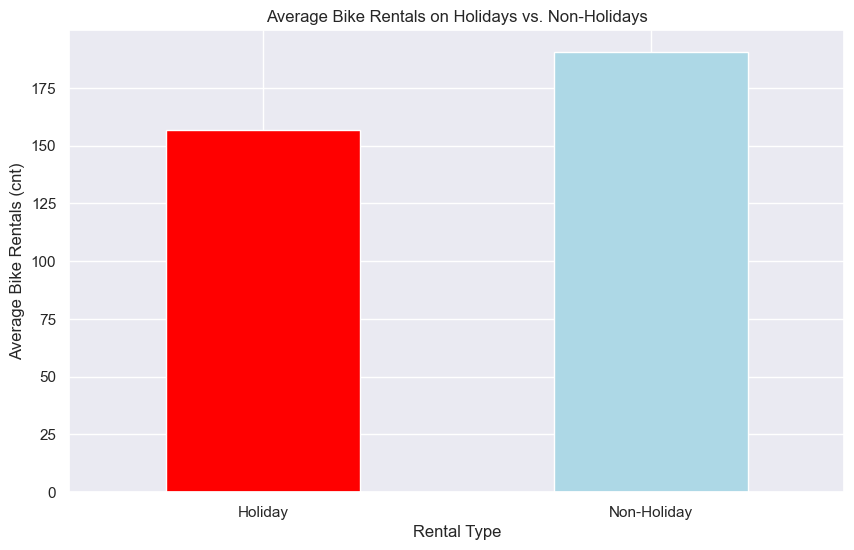

In [31]:
df_hour['rental_type'] = df_hour['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Group the data by rental type and calculate the average rentals for each group
rental_type_average = df_hour.groupby('rental_type')['cnt'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
rental_type_average.plot(kind='bar', color=['red', 'lightblue'])
plt.xlabel('Rental Type')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Bike Rentals on Holidays vs. Non-Holidays')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


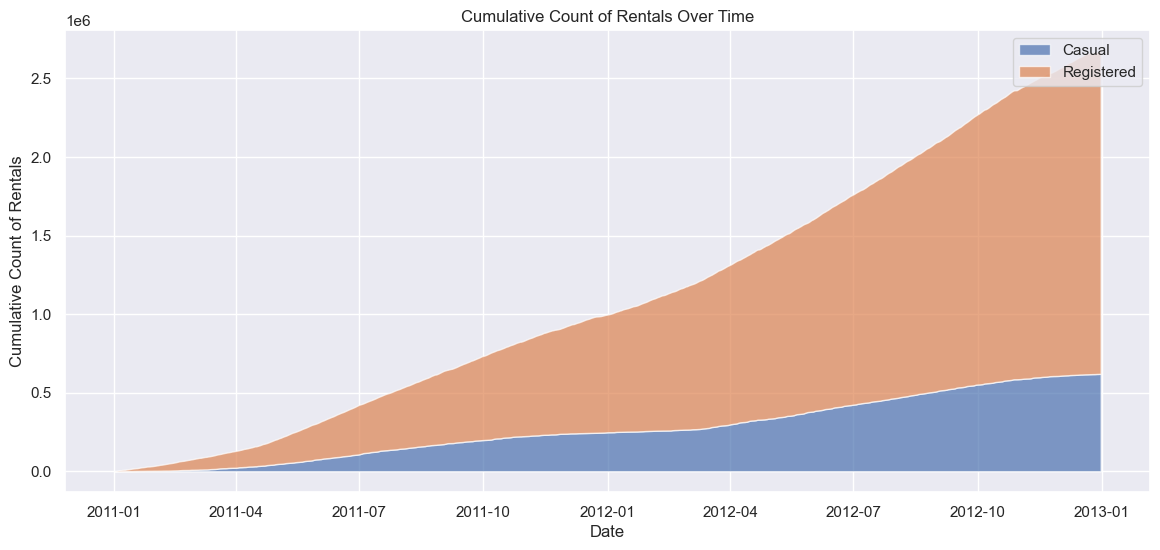

In [32]:

# Create a new column 'date' to store the date in datetime format
df_day['date'] = pd.to_datetime(df_day['dteday'])
df_day.sort_values('date', inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the cumulative counts for casual and registered users as stacked areas
ax.fill_between(df_day['date'], df_day['casual'].cumsum(), label='Casual', alpha=0.7)
ax.fill_between(df_day['date'], df_day['registered'].cumsum(), df_day['casual'].cumsum(), label='Registered', alpha=0.7)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Count of Rentals')
ax.set_title('Cumulative Count of Rentals Over Time')

# Add a legend
ax.legend()
plt.grid(True)

plt.show()


C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Weekday')

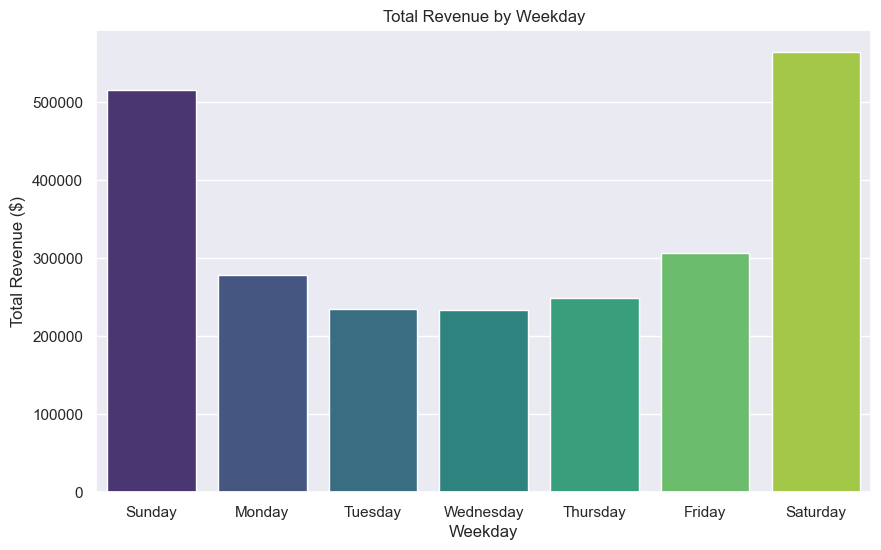

In [33]:
# Make a copy of df_hour to work with the revenue data
revenue_data = df_hour.copy()

# Group by weekday and get sum of total revenue per weekday
revenue_by_weekday = revenue_data.groupby('weekday')['Total_Revenue'].sum().reset_index()

# Map the number in the weekday to its actual day name
weekday_map = {0: 'Sunday', 
               1: 'Monday', 
               2: 'Tuesday', 
               3: 'Wednesday', 
               4: 'Thursday', 
               5: 'Friday', 
               6: 'Saturday'}

revenue_by_weekday['weekday'] = revenue_by_weekday['weekday'].map(weekday_map)

# Sort the dataframe by 'weekday'
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
revenue_by_weekday['weekday'] = pd.Categorical(revenue_by_weekday['weekday'], categories=ordered_days, ordered=True)
revenue_by_weekday = revenue_by_weekday.sort_values('weekday')

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='Total_Revenue', data=revenue_by_weekday, palette='viridis')
plt.title('Total Revenue by Weekday')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Weekday')

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

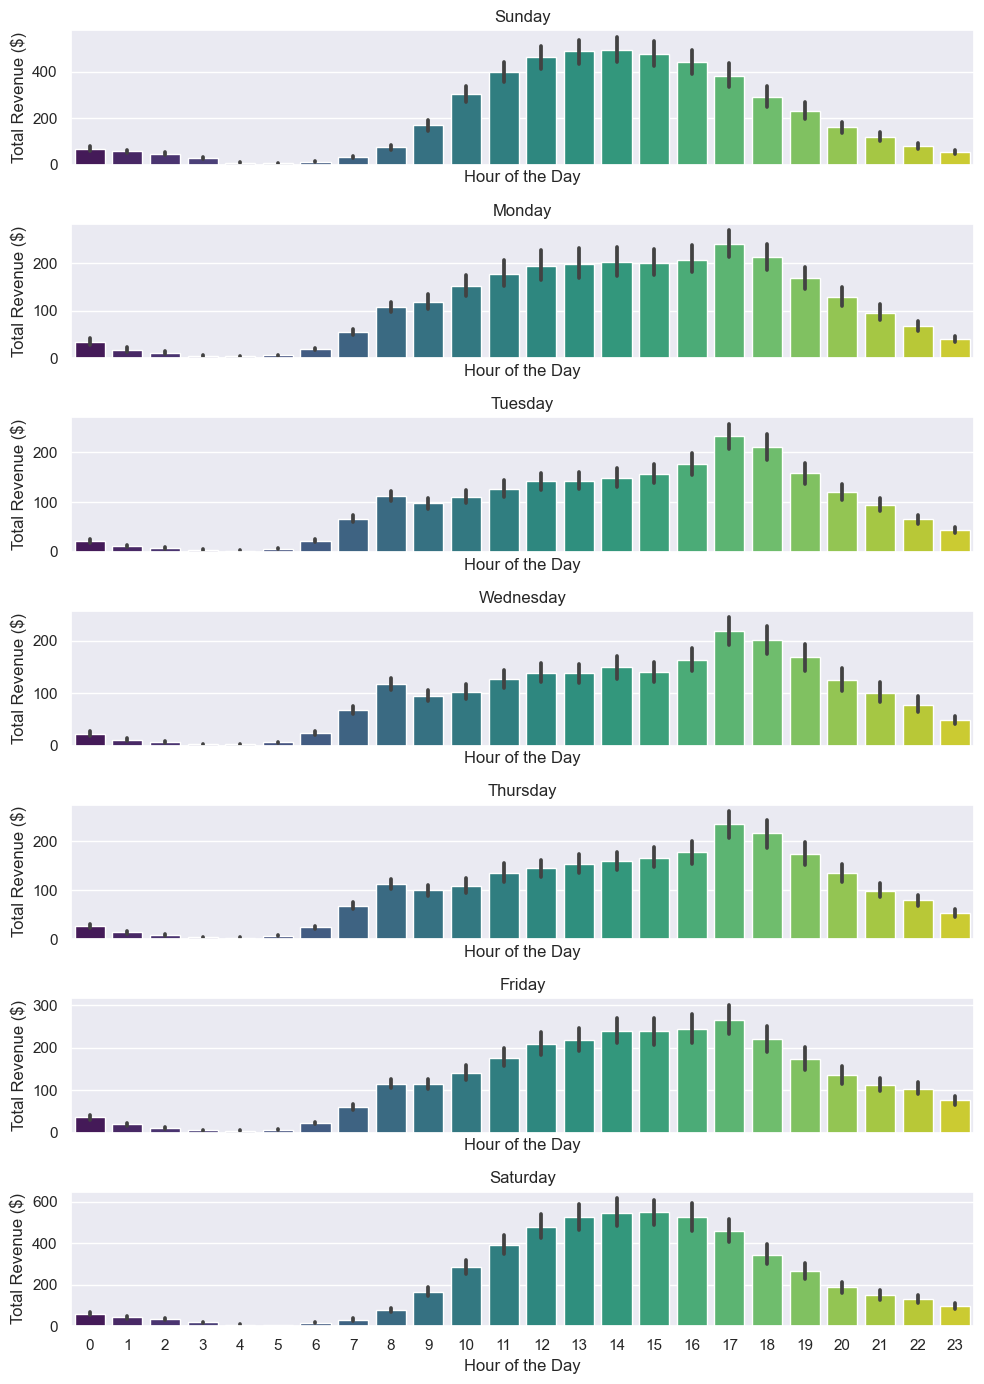

In [34]:
fig, axes = plt.subplots(7, 1, figsize=(10, 14), sharex=True)  

for i, (weekday, group) in enumerate(revenue_data.groupby('weekday')):
    ax = axes[i]
    group = group.sort_values('hr')  # Sort values by hour to make sure they are in order
    sns.barplot(x='hr', y='Total_Revenue', data=group, ax=ax, palette='viridis')
    ax.set_title(weekday_map[weekday])
    ax.set_ylabel('Total Revenue ($)')
    ax.set_xlabel('Hour of the Day')

plt.tight_layout()
plt.show()

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


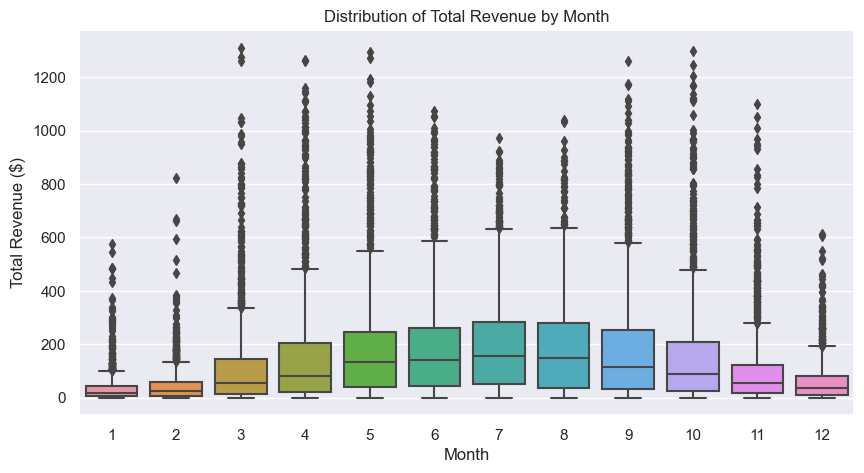

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='mnth', y='Total_Revenue', data=revenue_data)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Month')
plt.show()

C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keevi\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


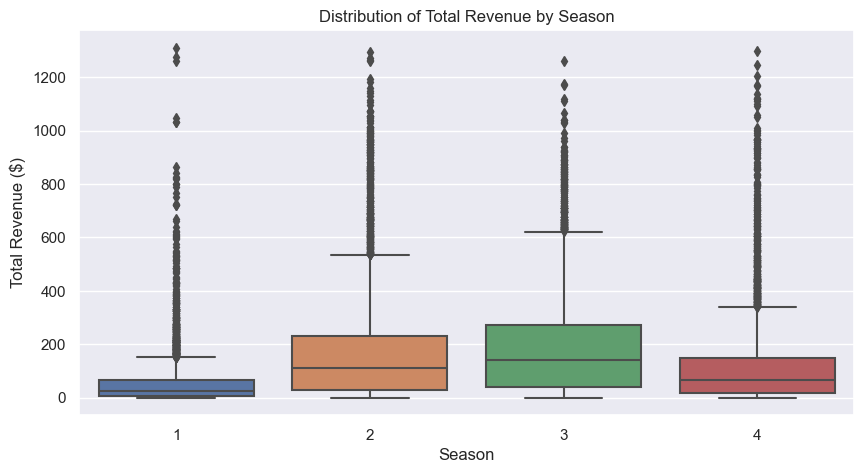

In [36]:
# Map the 'season' column using the dictionary
df_hour['season'] = df_hour['season'].map(season_mapping)

plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='Total_Revenue', data=revenue_data)
plt.xlabel('Season')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Season')
plt.show()

In [37]:
# # Map season values to their corresponding names
# season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
# df_hour['season_name'] = df_hour['season'].map(season_mapping)

# # Map weathersit values to their descriptions
# weathersit_mapping = {
#     1: 'Clear, Few clouds, Partly cloudy',
#     2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
#     3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
#     4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
# }
# df_hour['weathersit_desc'] = df_hour['weathersit'].map(weathersit_mapping)

# # Scatter plot of season vs temp with different colors for each weathersit
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_hour, x='season_name', y='temp', hue='weathersit_desc', palette='magma')
# plt.title('Season vs. Temperature by Weather Situation')
# plt.xlabel('Season')
# plt.ylabel('Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Weather Situation')
# plt.show()

# # Grouped bar chart of season vs weathersit and their average temp
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_hour, x='season_name', y='temp', hue='weathersit_desc', ci=None, palette='magma')
# plt.title('Season vs. Temperature by Weather Situation (Average)')
# plt.xlabel('Season')
# plt.ylabel('Average Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend(title='Weather Situation')
# plt.show()




In [38]:
# # Map season values to their corresponding names
# season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
# df_hour['season_name'] = df_hour['season'].map(season_mapping)

# # Create a boxplot or violin plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_hour, x='season_name', y='temp', palette='magma')
# plt.title('Temperature vs. Season')
# plt.xlabel('Season')
# plt.ylabel('Temperature')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()


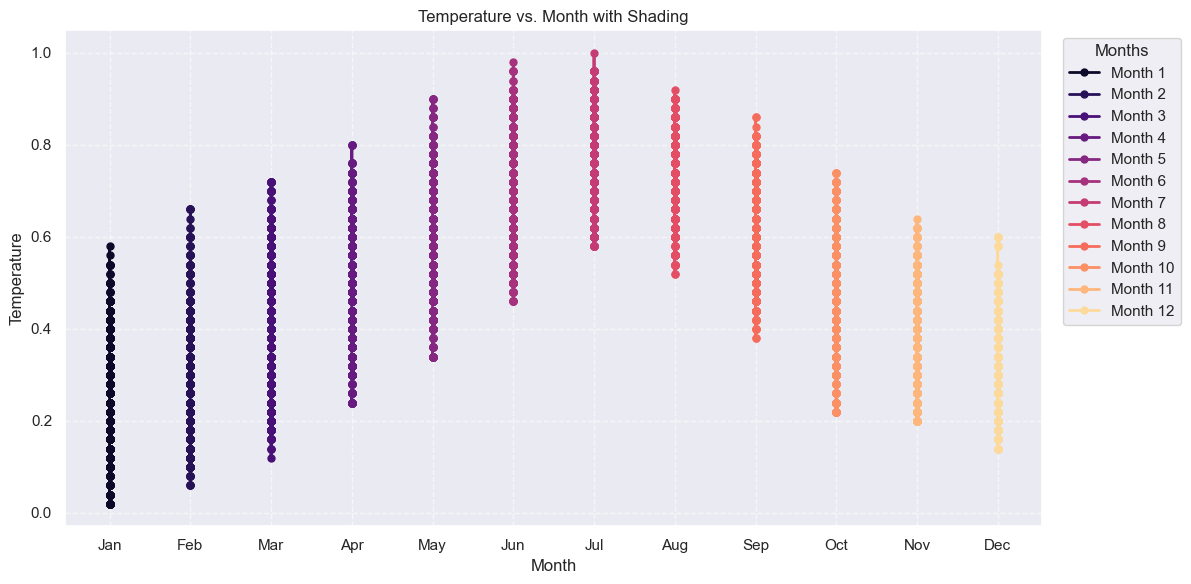

In [39]:
plt.figure(figsize=(12, 6))

# Custom colors for each month
colors = sns.color_palette('magma', n_colors=12)

# Plot temperature vs. month with lines and shading
for month in range(1, 13):
    subset = df_hour[df_hour['mnth'] == month]
    plt.plot(subset['mnth'], subset['temp'], label=f'Month {month}', color=colors[month-1], marker='o', markersize=5, linewidth=2)
    plt.fill_between(subset['mnth'], subset['temp'].min(), subset['temp'].max(), alpha=0.2, color=colors[month-1])

plt.title('Temperature vs. Month with Shading')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Months', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()




In [40]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Casual_Revenue,Registered_Revenue,Total_Revenue,rental_type
0,1,2011-01-01,spring,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,10.5,1.04,11.54,Non-Holiday
1,2,2011-01-01,spring,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,28.0,2.56,30.56,Non-Holiday
2,3,2011-01-01,spring,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,17.5,2.16,19.66,Non-Holiday
3,4,2011-01-01,spring,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,10.5,0.80,11.30,Non-Holiday
4,5,2011-01-01,spring,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,0.0,0.08,0.08,Non-Holiday


In [41]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Casual_Revenue,Registered_Revenue,Total_Revenue,rental_type
0,1,2011-01-01,spring,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,10.5,1.04,11.54,Non-Holiday
1,2,2011-01-01,spring,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,28.0,2.56,30.56,Non-Holiday
2,3,2011-01-01,spring,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,17.5,2.16,19.66,Non-Holiday
3,4,2011-01-01,spring,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,10.5,0.80,11.30,Non-Holiday
4,5,2011-01-01,spring,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,0.0,0.08,0.08,Non-Holiday


In [42]:
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour.drop(['dteday'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)

df_hour.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Casual_Revenue,Registered_Revenue,Total_Revenue,rental_type,year,month,day
0,1,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,10.5,1.04,11.54,Non-Holiday,2011,1,1
1,2,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,28.0,2.56,30.56,Non-Holiday,2011,1,1
2,3,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,17.5,2.16,19.66,Non-Holiday,2011,1,1
3,4,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,10.5,0.80,11.30,Non-Holiday,2011,1,1
4,5,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.0,0.08,0.08,Non-Holiday,2011,1,1


In [43]:
X = df_hour.drop(['Total_Revenue'], axis=1) 
y = df_hour['Total_Revenue'] 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

### Pre-processing for models

In [45]:
# Drop columns
cols_to_drop = [
    'instant', 
    'yr', 
    'mnth', 
    'workingday', 
    'rental_type', 
    'casual', 
    'registered', 
    'Casual_Revenue', 
    'Registered_Revenue'
]

X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)

In [46]:
# Create dummies for categorical columns
X_train = pd.get_dummies(X_train, columns=['season', 'weekday', 'weathersit'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['season', 'weekday', 'weathersit'], drop_first=True)

# Add in weathersit_4 into X_test since it was not added automatically
X_test['weathersit_4'] = 0

In [47]:
# Scale variables
scaler = StandardScaler()
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

In [48]:
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

### Support Vector Machine (SVM) Regression

In [49]:
# Initialize SVR using radial basis function (RBF) as a kernal
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit the model
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [50]:
# Make Predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [51]:
# Evaluate Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.8332345086764985
Test RMSE: 128.5372891130423


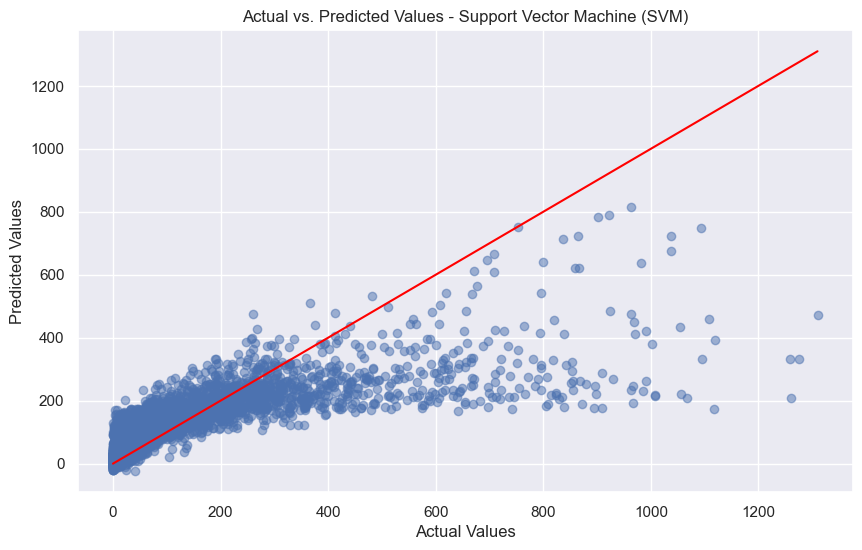

In [52]:
# Actual vs predicted plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Support Vector Machine (SVM)')
plt.show()

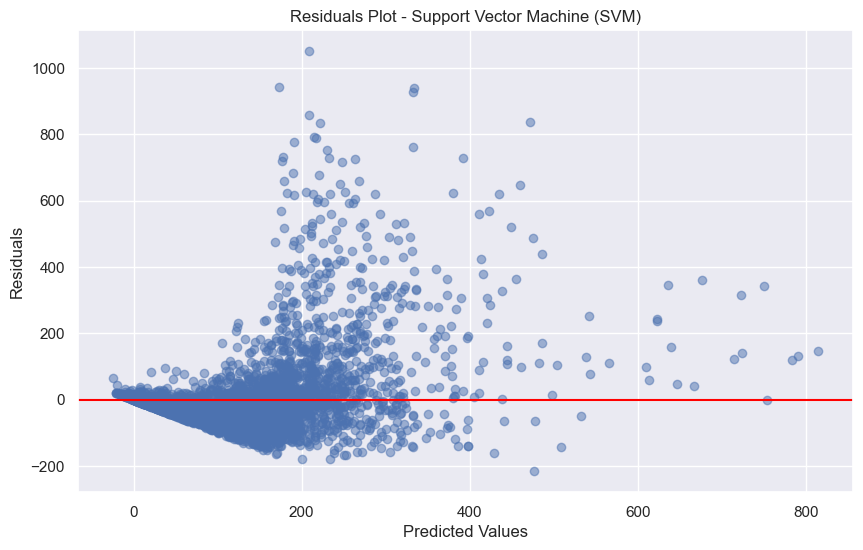

In [53]:
# Residuals Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(10,6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Support Vector Machine (SVM)')
plt.show()

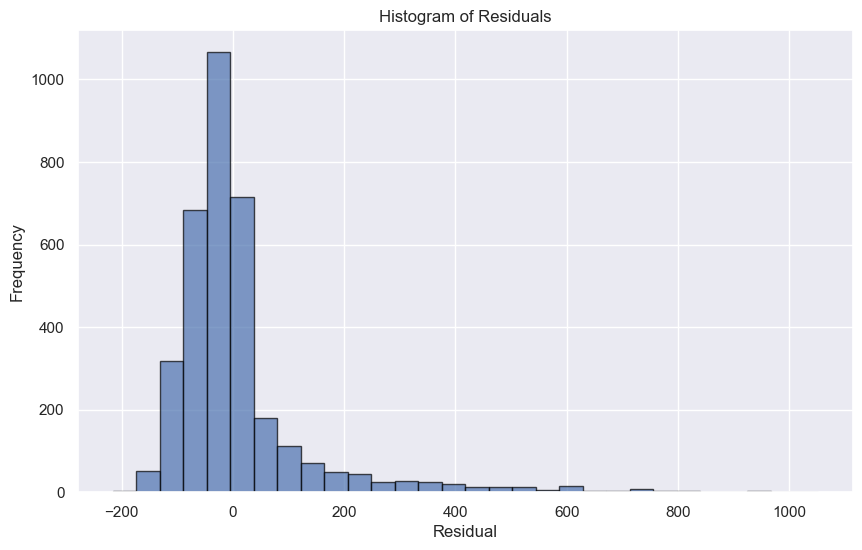

In [54]:
# Histogram of Residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Neural Networks

In [55]:
# Set data types for model to usability
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Need to set weathersit_4 for X_test since X_train contains it
X_test['weathersit_4'] = 0.0

In [56]:
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  # No activation function for regression
])

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use MSE as loss, MAE as metric

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
348/348 [==============================] - 2s 3ms/step - loss: 15850.7939 - mae: 77.8908 - val_loss: 14086.5713 - val_mae: 74.0704
Epoch 2/10
348/348 [==============================] - 1s 2ms/step - loss: 13829.0723 - mae: 71.5504 - val_loss: 13253.3164 - val_mae: 65.3340
Epoch 3/10
348/348 [==============================] - 1s 2ms/step - loss: 13293.5986 - mae: 69.2642 - val_loss: 14559.6377 - val_mae: 86.0383
Epoch 4/10
348/348 [==============================] - 1s 2ms/step - loss: 12985.5059 - mae: 69.3309 - val_loss: 12499.5020 - val_mae: 66.9583
Epoch 5/10
348/348 [==============================] - 1s 2ms/step - loss: 12287.3320 - mae: 67.4422 - val_loss: 11833.5273 - val_mae: 64.8734
Epoch 6/10
348/348 [==============================] - 1s 2ms/step - loss: 11352.8896 - mae: 64.9622 - val_loss: 10799.5625 - val_mae: 59.9174
Epoch 7/10
348/348 [==============================] - 1s 2ms/step - loss: 10744.3164 - mae: 63.9922 - val_loss: 10119.2617 - val_mae: 58.2211
Epoch 

In [58]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

109/109 [==============================] - 0s 2ms/step - loss: 9266.3574 - mae: 58.9175
Test Loss (MSE): 9266.3574
Mean Absolute Error: 58.9175


In [59]:
# Predictions
y_pred = model.predict(X_test)
y_pred

109/109 [==============================] - 0s 2ms/step


array([[120.15107  ],
       [-10.8430605],
       [ 24.773104 ],
       ...,
       [197.90747  ],
       [567.3104   ],
       [ -0.7139562]], dtype=float32)

In [60]:
# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Setting squared=False gives RMSE in sklearn 0.22+
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error (MAE): 58.9175
Mean Squared Error (MSE): 9266.3574
Root Mean Squared Error (RMSE): 96.2619
R-squared: 0.7381


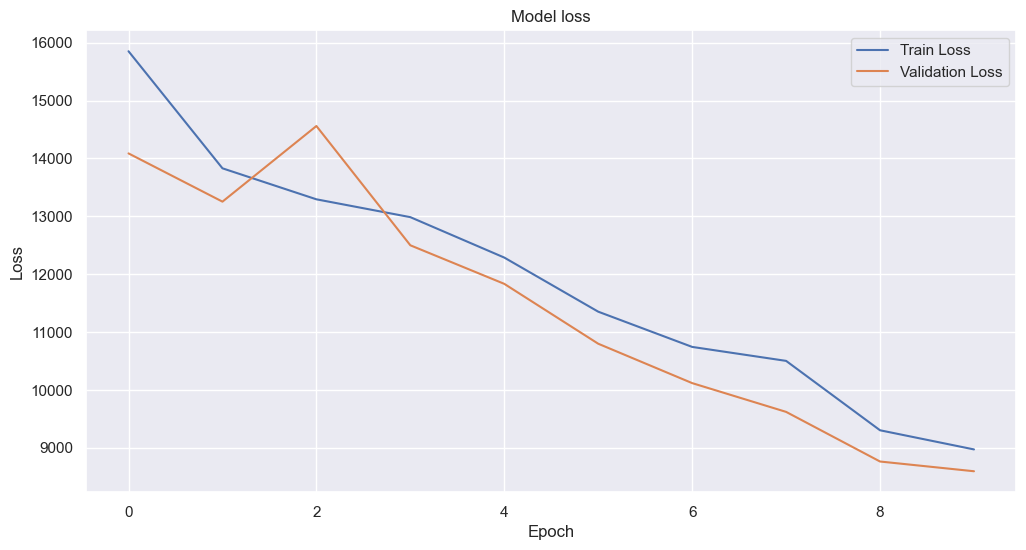

In [61]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

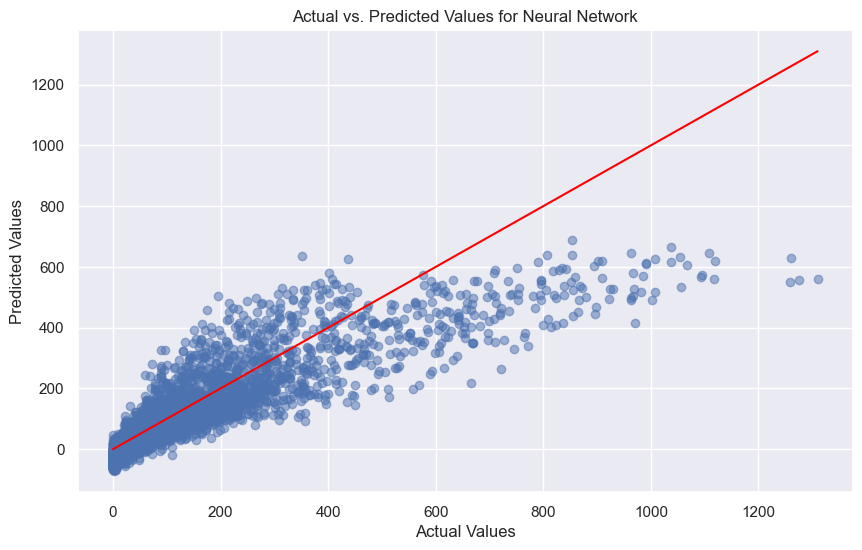

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Neural Network')
plt.show()

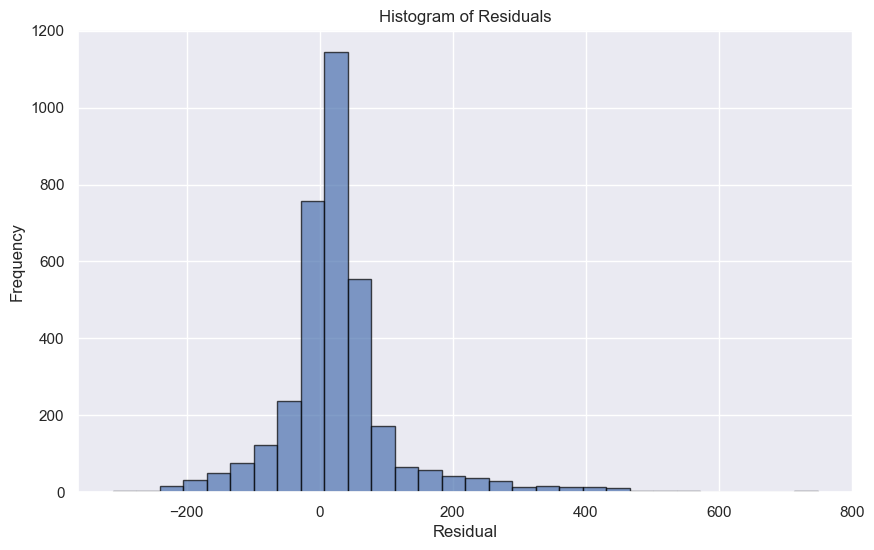

In [63]:
residuals = y_test - y_pred.squeeze()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

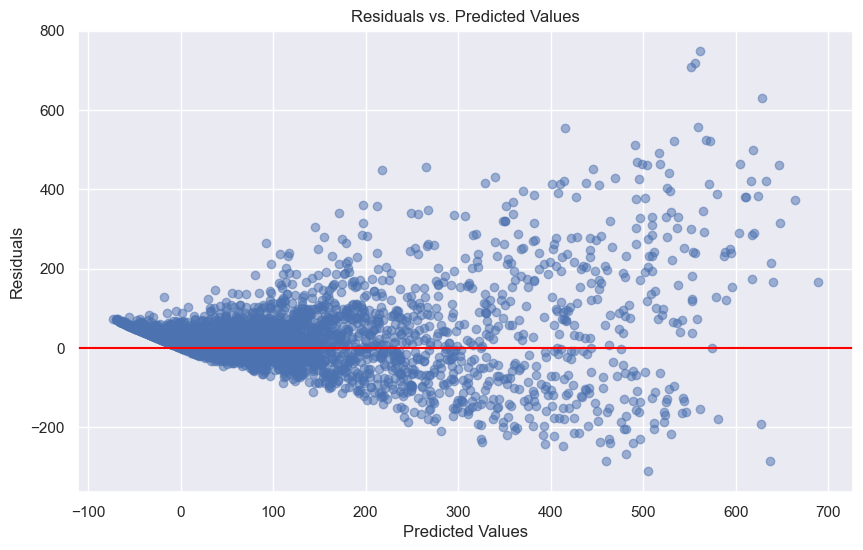

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### Ridge Regression 

In [65]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Range of alphas for tuning
alphas = np.logspace(-6, 6, 13)

# Create RidgeCV model with a range of alphas. RidgeCV automatically finds alpha 
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Get the best alpha value selected by RidgeCV
best_alpha = ridge_cv.alpha_
ridge = Ridge(alpha=best_alpha)

# Fit our Ridge model training set
ridge.fit(X_train, y_train)

# Make predictions
y_pred_rr = ridge.predict(X_test)

# Print the results
print("Best alpha from RidgeCV:", best_alpha)

Best alpha from RidgeCV: 1.0


/Users/kevinbaum/ENTER/envs/ADS505/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.3963e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Ridge Regression Feature Importance

In [66]:
# Calculate the coefficients
coef_abs = np.abs(ridge.coef_)

# Sort feature importances in descending order regardless of neg or pos correlation
sorted_indices = np.argsort(coef_abs)[::-1]
sorted_coef = ridge.coef_[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]

# Create a bar plot of feature importances. This shows importance both negative and positive. 
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coef)), sorted_coef)
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Values")
plt.title("Feature Importance in Ridge Regression (Descending Order)")
plt.show()


NameError: name 'feature_names' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Scores 
mae = mean_absolute_error(y_test, y_pred_rr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
r2 = r2_score(y_test, y_pred_rr)
mse = mean_squared_error(y_test, y_pred_rr)


#Print them all
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

In [ ]:
# Calculate the residuals for ridge
residuals = y_test - y_pred_rr  # Assuming y_pred_rr contains your Ridge regression predictions

# Create a scatter plot of residuals
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_rr, residuals, alpha=0.5)
plt.title('Residuals Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g', linestyle='--') 
plt.show()

### Lasso Regression

In [ ]:
# Alpha tuning 
param_grid = {
    'alpha': np.logspace(-9, 8, 13)  
}

# Lasso model
lasso = Lasso()

# Do a grid search for lasso 
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value 
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso model with the best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

print("Best alpha from Lasso CV:", best_alpha)


# Get feature importances
feature_importances_rr = np.abs(lasso.coef_)

# Sort feature importances in descending order
sorted_feature_importances_rr = np.argsort(-feature_importances_rr)

# Reverse the order to get it descending
sorted_feature_importances_rr = sorted_feature_importances_rr[::-1]

# Get the corresponding feature names
feature_names_rr = X_train.columns  

# Visualize the top 10 important features
N = 10  
plt.figure(figsize=(10, 6))
plt.barh(range(N), feature_importances[sorted_feature_importances[:N]])
plt.yticks(range(N), feature_names[sorted_feature_importances[:N]])
plt.xlabel("Lasso Coefficient Magnitude")
plt.title("Top {} Feature Importances".format(N))
plt.show()


In [ ]:
# Calculate evaluation metrics for Lasso
maelr = mean_absolute_error(y_test, y_pred_lasso)
mselr = mean_squared_error(y_test, y_pred_lasso)
rmselr = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2lr = r2_score(y_test, y_pred_lasso)

# Print metrics
print(f"Mean Absolute Error (MAE): {maelr}")
print(f"Mean Squared Error (MSE): {mselr}")
print(f"Root Mean Squared Error (RMSE): {rmselr}")
print(f"R-squared (R2): {r2lr}")

In [ ]:
# Residual Plot 

# Calculate the residuals
residuals_lasso = y_test - y_pred_lasso

# Create a residual plot
plt.figure(figsize=(9, 6))
plt.scatter(y_pred_lasso, residuals_lasso)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.axhline(y=0, color='g', linestyle='--')
plt.show()

### Random Forest

The Random Forest model is being used as a regression model for the project. It is being used to predict bike sharing demands, leveraging the provided features, such as weather conditions, temperature, day of the week to name a few in order to make these predictions. The ultimate goal is the gain insights into factors affecting bike rentals and to develop a predictive model.

In [50]:
# Required Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE), R-squared (R2), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)

# Print the Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 2110.5106829526126
R-squared (R2): 0.9403579816814889
Root Mean Squared Error (RMSE): 45.94029476344936
Mean Absolute Error (MAE): 26.41523176064442


#### Feature Importance Plot

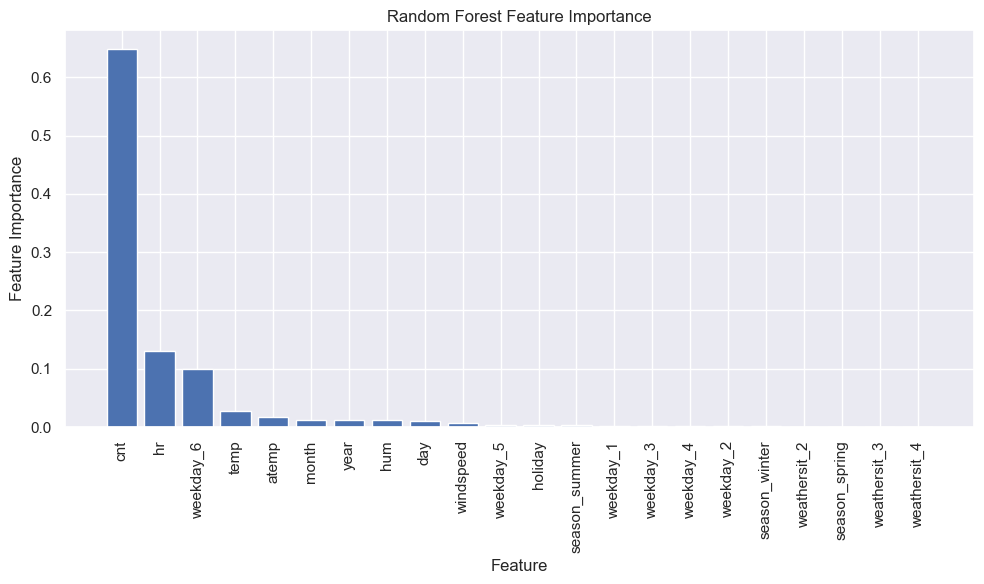

In [51]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


#### Prediction vs. Actual Plot

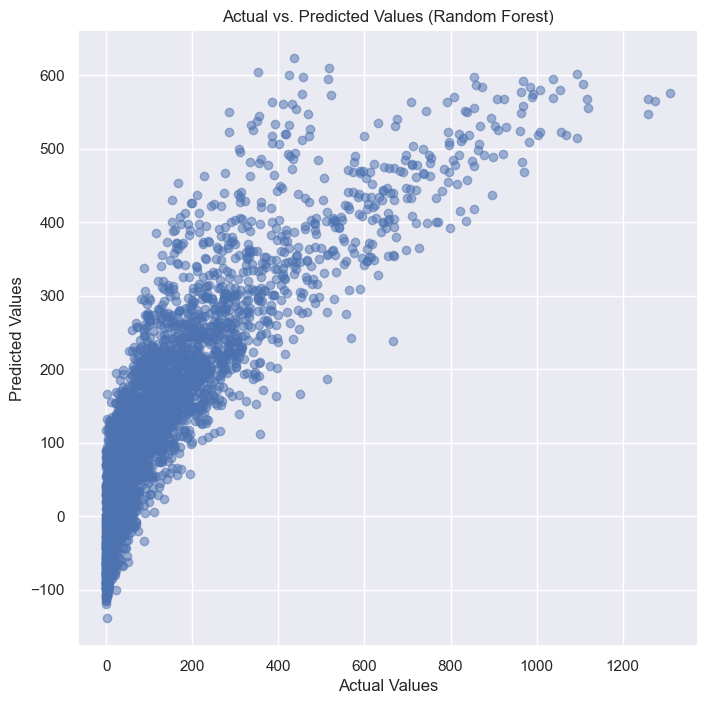

In [60]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.show()

#### Residual Plot

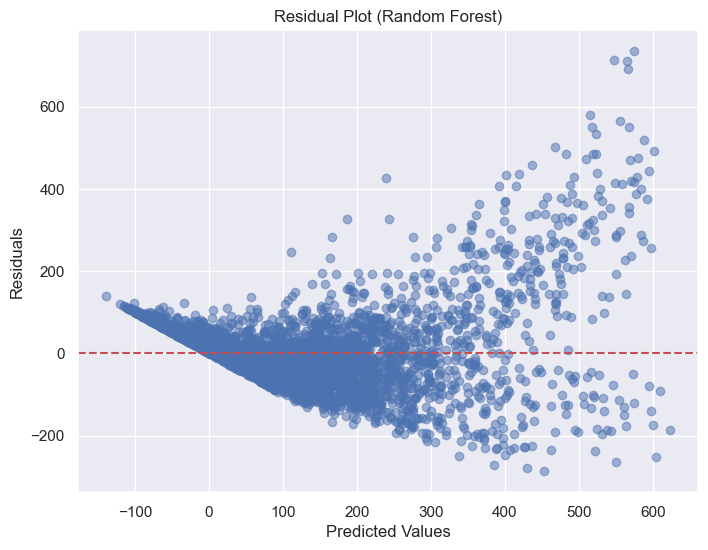

In [61]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Multiple Linear Regression

Multiple Linear Regression is a classical statistical and machine learning model with its own set of advantages. It results are easily interpretable and it allows each predictor variable to be understood with regards to bike rental counts. It can also help to identify which factors have a significant impact on demand. It is a straightforward way to explain the contributionns of each predictor variable and will provide a good baseline model. It is quick, but is also requires validation of assumptions and evaluation of the models performance.

In [62]:
# Create and train the Multiple Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_regression_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE

# Print the Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 10362.520732745032
R-squared (R2): 0.7071601407372705
Root Mean Squared Error (RMSE): 101.79646719186788
Mean Absolute Error (MAE): 69.5941683773681


### Plot

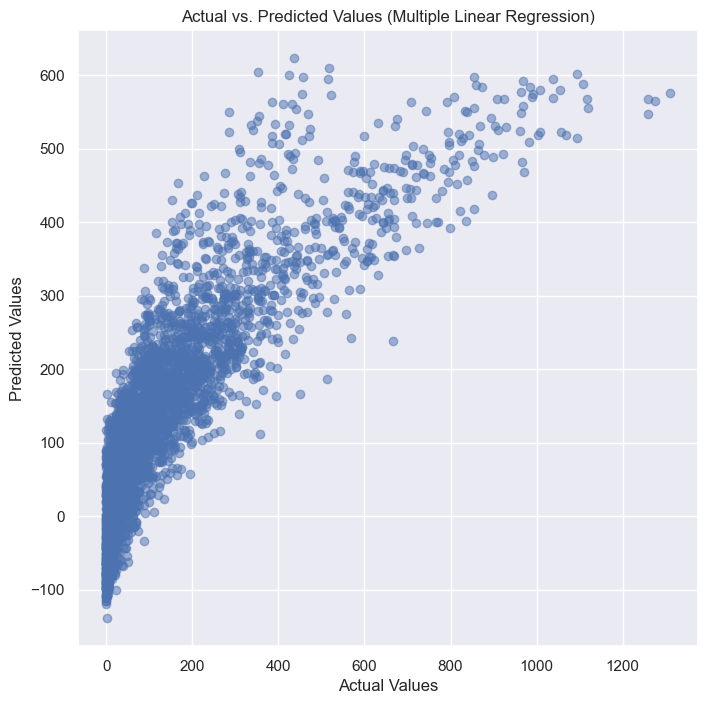

In [56]:
# Create a figure and set its size
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Label the x-axis and y-axis
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("Actual vs. Predicted Values (Multiple Linear Regression)")

# Display the plot
plt.show()

#### Residual Plot

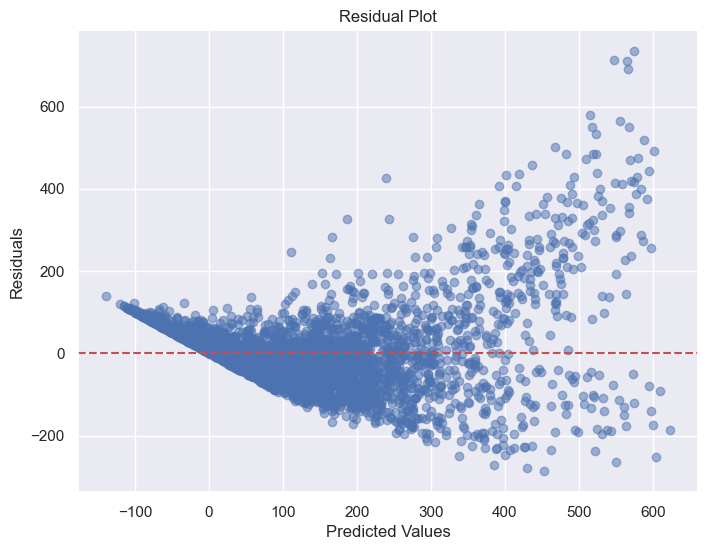

In [57]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

#### Histogram of Residuals

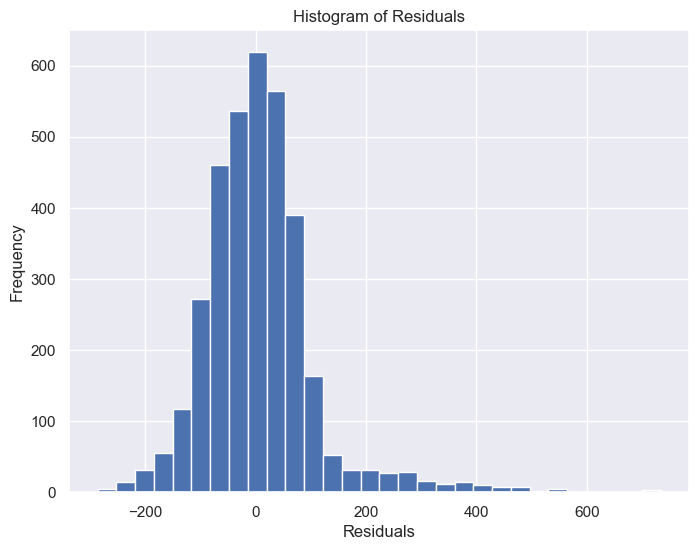

In [58]:
# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

#### Feature Importance

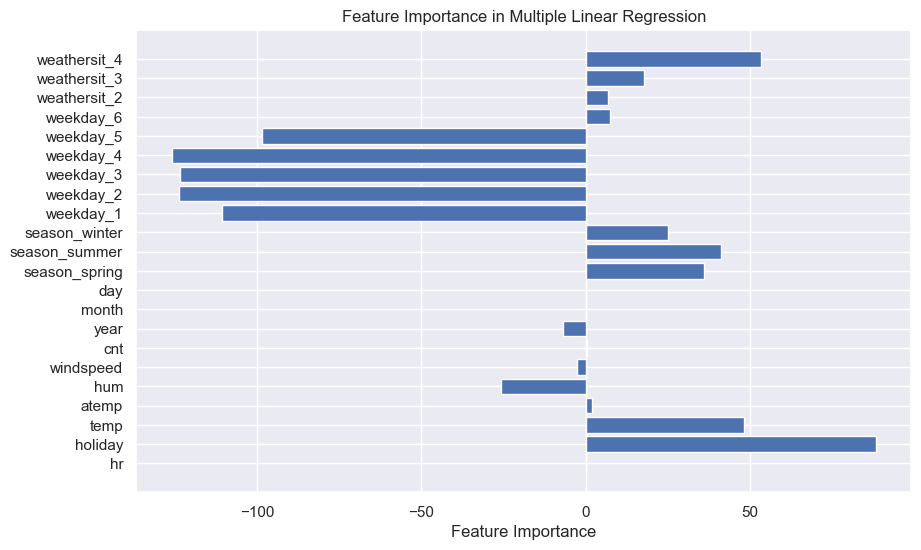

In [59]:
# Assuming you have a linear regression model named 'linear_regression_model'
feature_importance = linear_regression_model.coef_

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Multiple Linear Regression")
plt.show()

In [ ]:
X_train